<a href="https://colab.research.google.com/github/waigani64/ImageAnalysis/blob/main/Carbonate_Equilibria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

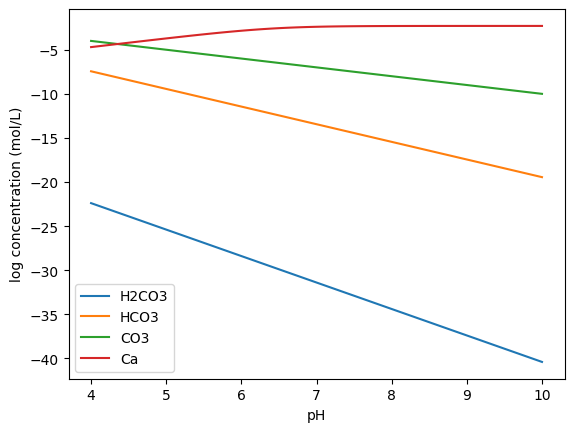

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def calculate_equilibria(pH, T):
    """Calculates the concentrations of major components in solution for the calcium carbonate equilibria"""
    # Equilibrium constants at temperature T (in Kelvin)
    K1 = 10**(-6.35 + 5157/T)
    K2 = 10**(-10.33 + 2914/T)
    # Total carbonate concentration
    CT = 0.0025  # mol/L
    # Carbonic acid species concentrations
    H2CO3 = 10**(-pH) / (1 + K1 / 10**(-pH) + K1*K2 / 10**(-2*pH))
    HCO3 = K1*H2CO3 / 10**(-pH)
    CO3 = K1*K2*H2CO3 / 10**(-2*pH)
    # Calcium ion concentration
    Ca = 2*CT / (1 + 10**(-pH + 6.4))
    # Plot the results
    plt.plot(pH, np.log10(H2CO3), label="H2CO3")
    plt.plot(pH, np.log10(HCO3), label="HCO3")
    plt.plot(pH, np.log10(CO3), label="CO3")
    plt.plot(pH, np.log10(Ca), label="Ca")
    plt.xlabel("pH")
    plt.ylabel("log concentration (mol/L)")
    plt.legend()
    plt.show()


# Example usage:
pH = np.linspace(4, 10, 100)
T = 25 + 273.15  # temperature in Kelvin
calculate_equilibria(pH, T)


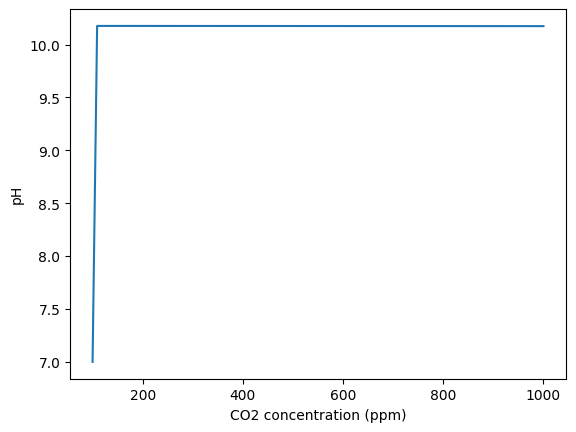

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
K_H = 1.5e-3  # Henry's constant for CO2 at 25°C (mol/L*atm)
K_1 = 4.45e-7  # Equilibrium constant for H2CO3 dissociation at 25°C (mol/L)
K_w = 1e-14  # Ion product constant for water at 25°C (mol^2/L^2)

# Initial conditions
pH0 = 7.0  # Initial pH of water
CO2_0 = 100e-6  # Initial atmospheric CO2 concentration (mol/L)

# Calculate pH as a function of CO2 concentration
CO2 = np.linspace(100e-6, 1000e-6, 100)  # CO2 concentration range (mol/L)
pH = np.zeros_like(CO2)  # Initialize pH array
pH[0] = pH0  # Set initial pH
for i in range(1, len(CO2)):
    # Calculate H2CO3 concentration using CO2-H2CO3 equilibrium
    H2CO3 = CO2[i] * K_H
    # Calculate H+ concentration using H2CO3 dissociation equilibrium
    H = (K_1 * H2CO3 + np.sqrt(K_1**2 * H2CO3**2 + 4*K_1*K_w)) / 2
    # Calculate pH from H+ concentration
    pH[i] = -np.log10(H)

# Plot the results
plt.plot(CO2*1e6, pH)
plt.xlabel("CO2 concentration (ppm)")
plt.ylabel("pH")
plt.show()
